In [1]:
import pandas as pd
import numpy as np
import plotnine as p9
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.DataFrame({
  'x' : np.random.normal(size = 1000),
  'correct' : np.random.choice([True, False], size = 1000)
})

In [3]:
df.head()

,x,correct
0,0.008337,True
1,-0.345206,False
2,-0.411485,False
3,0.662767,False
4,1.783039,True


In [4]:
df['q'], quantile_intervals = pd.qcut(df['x'], q = 5, labels = ['Very low', 'Low', 'Normal', 'High', 'Very high'], retbins = True)

In [5]:
df.head()

,x,correct,q
0,0.008337,True,Normal
1,-0.345206,False,Low
2,-0.411485,False,Low
3,0.662767,False,High
4,1.783039,True,Very high


In [6]:
df.groupby('q')['correct'].value_counts(normalize = True).unstack().reset_index().melt(id_vars = ['q'])

,q,correct,value
0,Very low,False,0.490
1,Low,False,0.545
2,Normal,False,0.520
3,High,False,0.485
4,Very high,False,0.520
5,Very low,True,0.510
6,Low,True,0.455
7,Normal,True,0.480
8,High,True,0.515
9,Very high,True,0.480


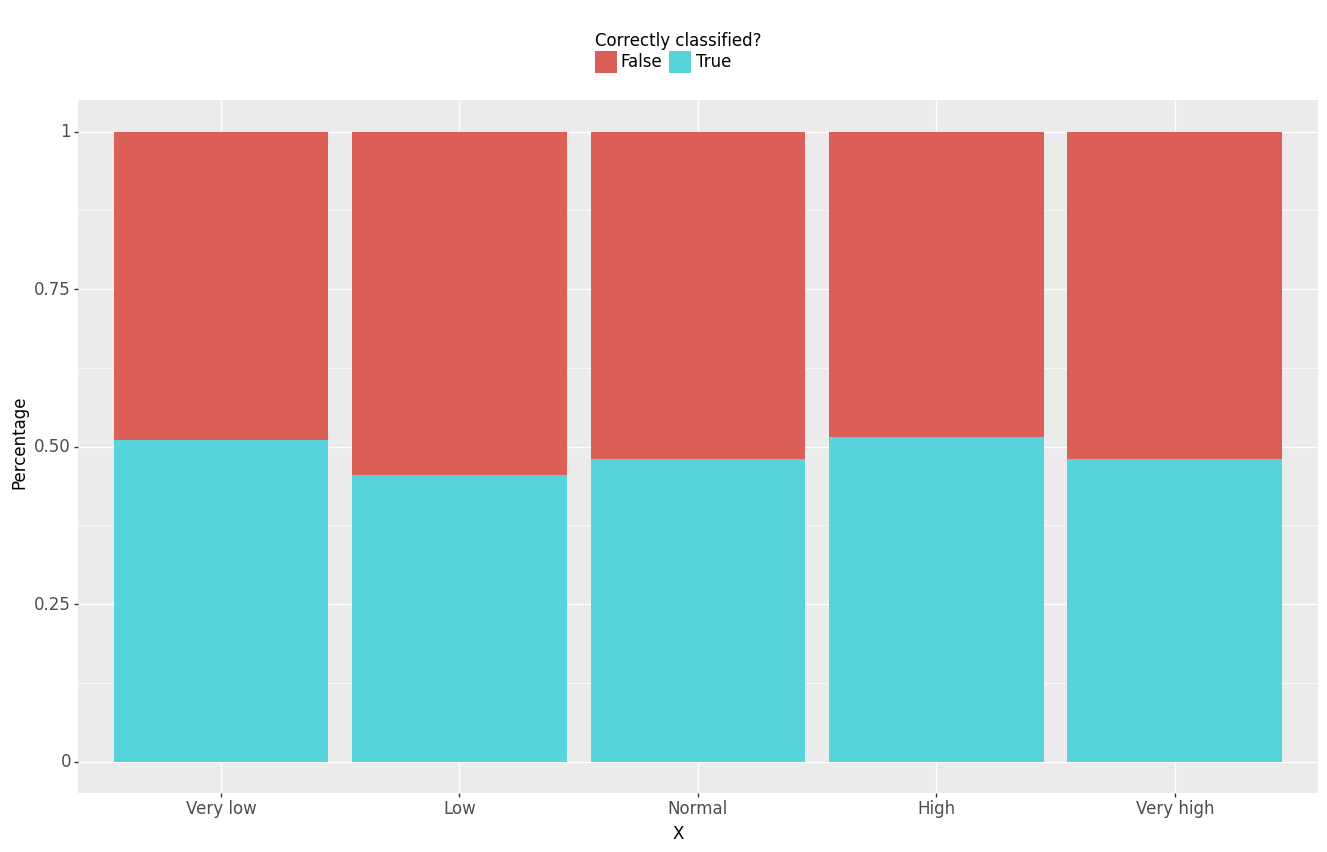

<ggplot: (381121003)>

In [7]:
p9.ggplot(
  df.groupby('q')['correct'].value_counts(normalize = True).unstack().reset_index().melt(id_vars = ['q']),
  p9.aes(x = 'q', y = 'value', fill = 'correct')
) + p9.geom_col() + \
  p9.ylab('Percentage') + \
  p9.xlab('X') + \
  p9.labs(fill = 'Correctly classified?') + \
  p9.theme_gray() + \
  p9.theme(
    legend_position = 'top',
    figure_size = (16, 9),
    text = p9.element_text(size = 12)
  )

In [8]:
df['correct'].value_counts(normalize = True).reset_index(name = 'value').rename(columns = {'index' : 'correct'}).assign(q = 'All data')

,correct,value,q
0,False,0.512,All data
1,True,0.488,All data


In [9]:
all_data_df = df['correct'].value_counts(normalize = True).reset_index(name = 'value').rename(columns = {'index' : 'correct'}).assign(q = 'All data')
quantile_df = df.groupby('q')['correct'].value_counts(normalize = True).unstack().reset_index().melt(id_vars = ['q'])

In [10]:
plot_df = pd.concat([all_data_df, quantile_df])
plot_df['q'] = pd.Categorical(plot_df['q'], categories = ['Very low', 'Low', 'Normal', 'High', 'Very high', 'All data'])

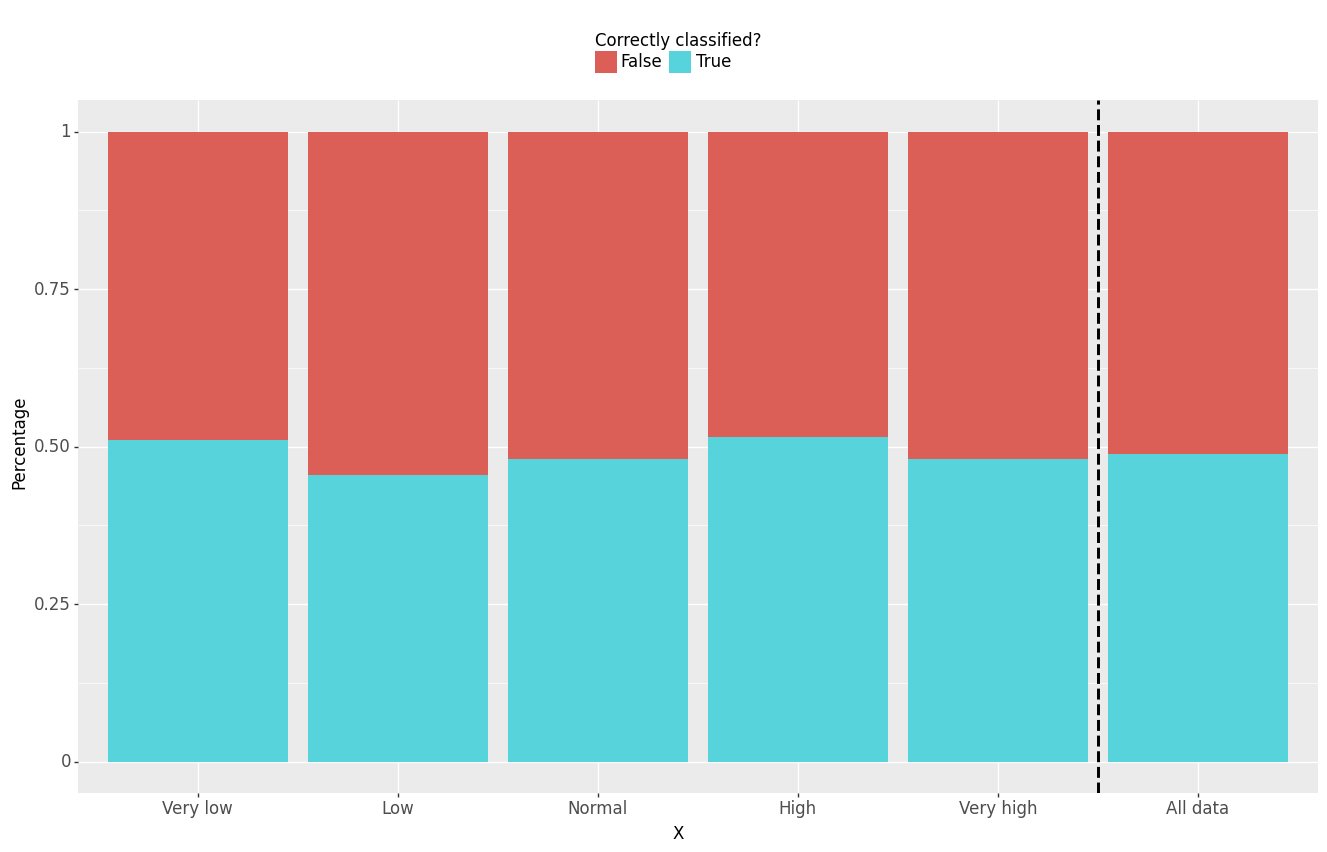

<ggplot: (381242510)>

In [11]:
p9.ggplot(
  plot_df,
  p9.aes(x = 'q', y = 'value', fill = 'correct')
) + \
  p9.geom_col() + \
  p9.geom_vline(xintercept = 5.5, linetype = 'dashed', size = 1.2) + \
  p9.ylab('Percentage') + \
  p9.xlab('X') + \
  p9.labs(fill = 'Correctly classified?') + \
  p9.theme_gray() + \
  p9.theme(
    legend_position = 'top',
    figure_size = (16, 9),
    text = p9.element_text(size = 12)
  )

In [12]:
#subgroup_feature_conditions = '\n'.join(error_rules.iloc[i]['feature_conditions']) + f'\n{subgroup_values.shape[0]} instances\n({np.round((subgroup_values.shape[0] / all_values.shape[0]) * 100, decimals = 3)}%)'


In [13]:
quantile_intervals

array([-3.17184953, -0.89442023, -0.22487792,  0.30841535,  0.8606453 ,
        3.36538234])

In [14]:
quantile_counts = df['q'].value_counts().reset_index(name = 'count').rename(columns = {'index' : 'q'}).set_index(keys = ['q']).to_dict(orient = 'index')

In [15]:
quantile_counts

{'Very low': {'count': 200},
 'Low': {'count': 200},
 'Normal': {'count': 200},
 'High': {'count': 200},
 'Very high': {'count': 200}}

In [16]:
quantile_text_labels = ['Very low', 'Low', 'Normal', 'High', 'Very high']
quantile_interval_labels = [f'({np.round(quantile_intervals[i], decimals = 3)}, {np.round(quantile_intervals[i + 1], decimals = 3)}]' for i in range(len(quantile_intervals) - 1)]
quantile_labels = [f'{quantile_text_labels[i]}\n{quantile_counts[quantile_text_labels[i]]["count"]} instances ({np.round((quantile_counts[quantile_text_labels[i]]["count"] / df.shape[0]) * 100, decimals = 3)}%)\n{quantile_interval_labels[i]}' for i in range(len(quantile_text_labels))]

In [17]:
# Add quantile_interval_labels to 'q' column
quantile_df['q'] = pd.Categorical(quantile_df['q'], categories = ['Very low', 'Low', 'Normal', 'High', 'Very high'], ordered = True)
quantile_df['q'] = quantile_df['q'].cat.rename_categories(quantile_labels)
quantile_df

,q,correct,value
0,"Very low\n200 instances (20.0%)\n(-3.172, -0.894]",False,0.490
1,"Low\n200 instances (20.0%)\n(-0.894, -0.225]",False,0.545
2,"Normal\n200 instances (20.0%)\n(-0.225, 0.308]",False,0.520
3,"High\n200 instances (20.0%)\n(0.308, 0.861]",False,0.485
4,"Very high\n200 instances (20.0%)\n(0.861, 3.365]",False,0.520
5,"Very low\n200 instances (20.0%)\n(-3.172, -0.894]",True,0.510
6,"Low\n200 instances (20.0%)\n(-0.894, -0.225]",True,0.455
7,"Normal\n200 instances (20.0%)\n(-0.225, 0.308]",True,0.480
8,"High\n200 instances (20.0%)\n(0.308, 0.861]",True,0.515
9,"Very high\n200 instances (20.0%)\n(0.861, 3.365]",True,0.480


In [18]:
all_data_df = df['correct'].value_counts(normalize = True).reset_index(name = 'value').rename(columns = {'index' : 'correct'}).assign(q = 'All data')

In [19]:
all_data_df['q'] = f'All data\n{df.shape[0]} instances (100%)'

In [20]:
all_data_df

,correct,value,q
0,False,0.512,All data\n1000 instances (100%)
1,True,0.488,All data\n1000 instances (100%)


In [21]:
plot_df = pd.concat([quantile_df, all_data_df])
plot_df['q'] = pd.Categorical(plot_df['q'], categories = plot_df['q'].unique())

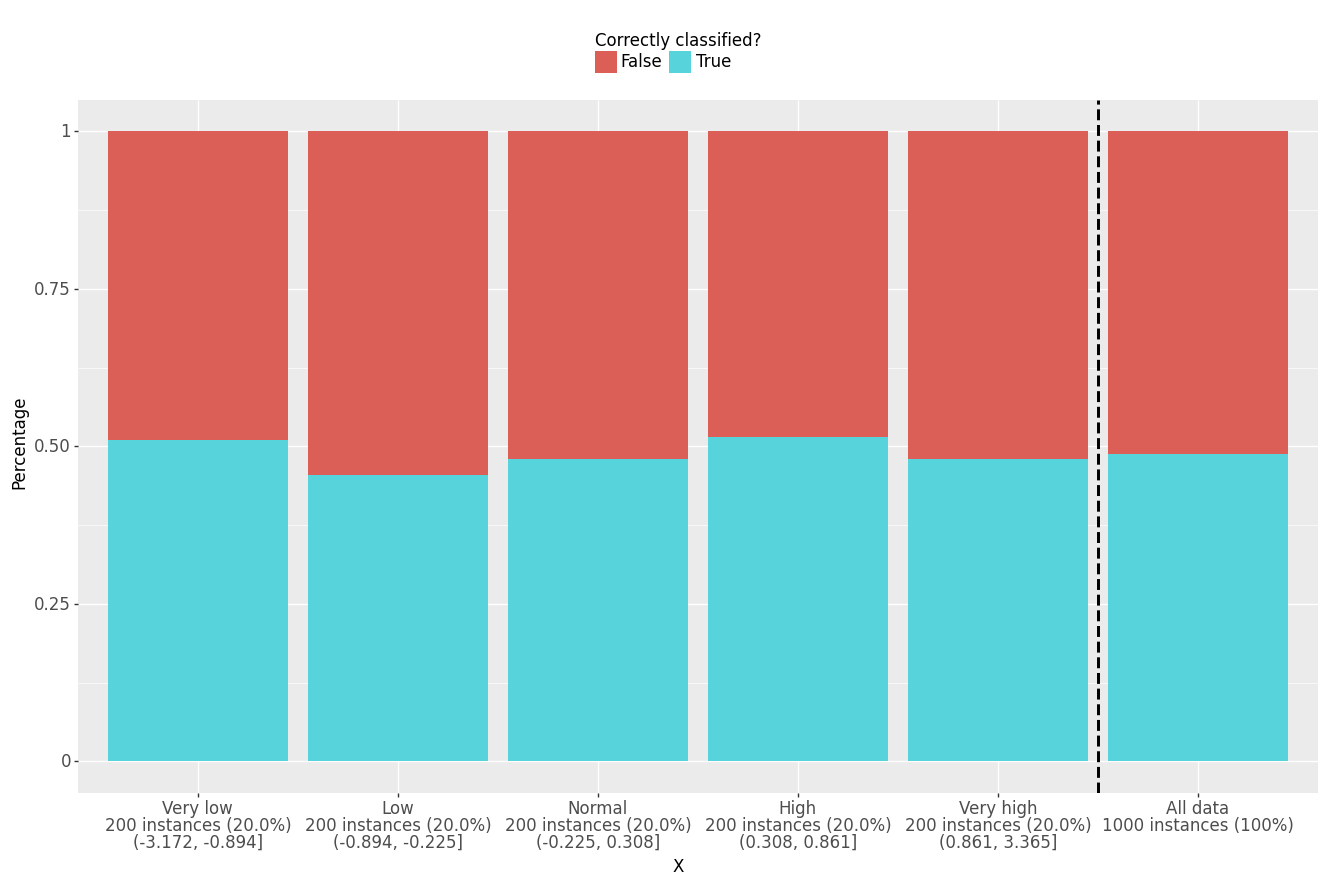

<ggplot: (381291945)>

In [22]:
p9.ggplot(
  plot_df,
  p9.aes(x = 'q', y = 'value', fill = 'correct')
) + \
  p9.geom_col() + \
  p9.geom_vline(xintercept = 5.5, linetype = 'dashed', size = 1.2) + \
  p9.ylab('Percentage') + \
  p9.xlab('X') + \
  p9.labs(fill = 'Correctly classified?') + \
  p9.theme_gray() + \
  p9.theme(
    legend_position = 'top',
    figure_size = (16, 9),
    text = p9.element_text(size = 12)
  )